In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [26]:
df_merge = pd.read_csv("/content/WELFake_Dataset.csv")

In [27]:
df_merge.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [28]:
df_merge = df_merge.rename(columns={'label': 'class'})


In [29]:
df_merge.head()

,Unnamed: 0,title,text,class
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [32]:
df_merge.columns

Index(['Unnamed: 0', 'title', 'text', 'class'], dtype='object')

In [33]:
df_merge.shape

(72134, 4)

In [34]:
df_merge = df_merge.drop(columns=['title', 'Unnamed: 0'])

In [35]:
df.head()

,Unnamed: 0,text,class
0,0,No comment is expected from Barack Obama Membe...,1
1,1,Did they post their votes for Hillary already?,1
2,2,"Now, most of the demonstrators gathered last ...",1
3,3,A dozen politically active pastors came here f...,0
4,4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [18]:
df = df_merge.drop(['Unnamed: 0'], axis = 1)

In [19]:
df.head(10)

,title,text,class
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [20]:
df.columns

Index(['title', 'text', 'class'], dtype='object')

In [22]:
df = df_merge.drop(['title'],axis = 1)

In [23]:
df.head()

,Unnamed: 0,text,class
0,0,No comment is expected from Barack Obama Membe...,1
1,1,Did they post their votes for Hillary already?,1
2,2,"Now, most of the demonstrators gathered last ...",1
3,3,A dozen politically active pastors came here f...,0
4,4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [36]:

df = df.set_index('Unnamed: 0')



In [38]:
df.head()

,text,class
Unnamed: 0,,
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [39]:
df = df.reset_index(drop=True)


In [40]:
df.head()

,text,class
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


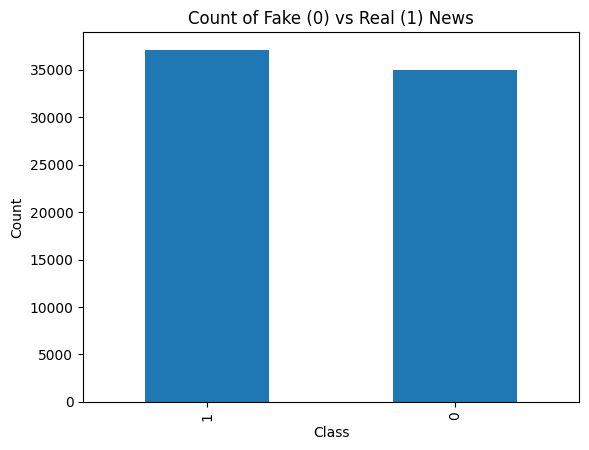

In [41]:
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of Fake (0) vs Real (1) News")
plt.show()


In [44]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [46]:
df["text"] = df["text"].fillna("").astype(str)
df["text"] = df["text"].apply(wordopt)


In [47]:
x = df["text"]
y = df["class"]


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [50]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [51]:
pred_lr=LR.predict(xv_test)

In [52]:
LR.score(xv_test, y_test)

0.9453254962847953

In [53]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8870
           1       0.94      0.96      0.95      9164

    accuracy                           0.95     18034
   macro avg       0.95      0.95      0.95     18034
weighted avg       0.95      0.95      0.95     18034



In [54]:
from sklearn.svm import LinearSVC

SVM = LinearSVC()
SVM.fit(xv_train, y_train)




LinearSVC()

In [55]:
pred_svm = SVM.predict(xv_test)

In [56]:
SVM.score(xv_test,y_test)

0.96251524897416

In [57]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8870
           1       0.96      0.97      0.96      9164

    accuracy                           0.96     18034
   macro avg       0.96      0.96      0.96     18034
weighted avg       0.96      0.96      0.96     18034



In [58]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [59]:
pred_dt = DT.predict(xv_test)

In [60]:
DT.score(xv_test,y_test)

0.9158256626372407

In [61]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      8870
           1       0.90      0.93      0.92      9164

    accuracy                           0.92     18034
   macro avg       0.92      0.92      0.92     18034
weighted avg       0.92      0.92      0.92     18034



In [62]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [63]:
pred_gbc = GBC.predict(xv_test)

In [64]:
GBC.score(xv_test, y_test)

0.9313518908727958

In [65]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8870
           1       0.91      0.96      0.93      9164

    accuracy                           0.93     18034
   macro avg       0.93      0.93      0.93     18034
weighted avg       0.93      0.93      0.93     18034



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_rfc))


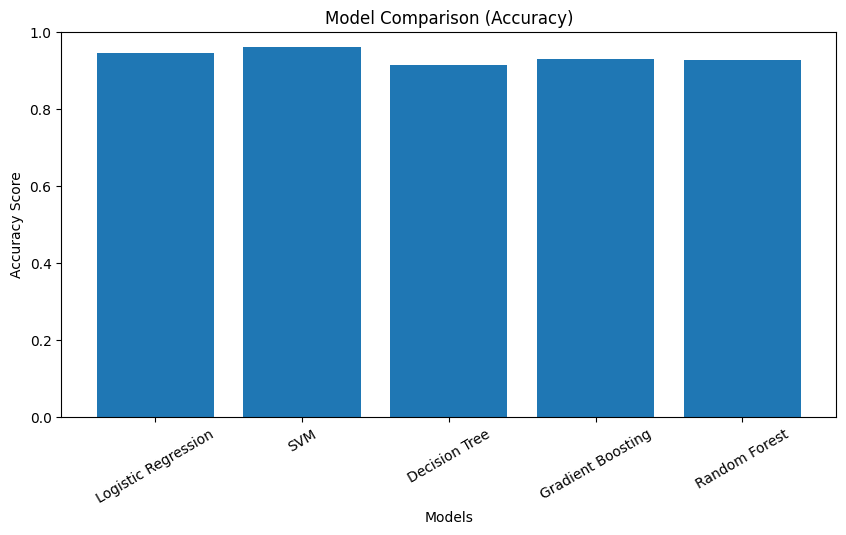

In [72]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracies
acc_lr  = accuracy_score(y_test, pred_lr)
acc_svm = accuracy_score(y_test, pred_svm)
acc_dt  = accuracy_score(y_test, pred_dt)
acc_gbc = accuracy_score(y_test, pred_gbc)
acc_rfc = accuracy_score(y_test, pred_rfc)

# Prepare data for graph
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracies = [acc_lr, acc_svm, acc_dt, acc_gbc, acc_rfc]

# Plot
plt.figure(figsize=(10,5))
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison (Accuracy)")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()


In [70]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_svm = SVM.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                                                   output_lable(pred_svm[0])))

In [77]:
news = str(input())
manual_testing(news)

The governor’s conversion tale, he said, began in a modest way: a friend gave him a leather-bound Bible with his name stamped on the cover when he was a teenager. “At first I didn’t get it,” he admitted. “I thought, who spends money on a Bible?” Later, after a semester studying philosophy in college, Mehra said a late-night movie scene and a solitary reading of Scripture crystallized his beliefs. He described a series of small decisions that led to a public profession of faith and, eventually, regular church leadership.  Mehra’s aides emphasize that his religious shift was personal and gradual, not political. Still, his willingness to speak bluntly about matters of faith has drawn the attention of a number of conservative religious groups that are eager to find a candidate who can both argue policy and inspire congregations. “He’s got the intellect and he’s got the conviction,” said a longtime evangelical organizer who asked not to be named. “That’s the combination our network looks fo

In [78]:
!pip install joblib


In [79]:
import joblib


In [80]:
joblib.dump(GBC, "gbc_model.pkl")
joblib.dump(SVM, "svm_model.pkl")
joblib.dump(vectorization, "vectorizer.pkl")


['vectorizer.pkl']